In [1]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
train_ds="/content/drive/MyDrive/datasetskincancer/data/train"
test_ds="/content/drive/MyDrive/datasetskincancer/data/test"


# Data preprocessing
****

In [5]:
os.listdir('/content/drive/MyDrive/datasetskincancer/data/train')

['benign', 'malignant']

In [6]:
batch_size=32
img_size=224

In [7]:
train_datagen = ImageDataGenerator(rescale=1/255.,
                             zoom_range=0.2,
                            width_shift_range=0.2,height_shift_range=0.2
                             )

test_datagen = ImageDataGenerator(rescale=1/255.)

train_generator = train_datagen.flow_from_directory(train_ds,
                                                target_size=(img_size, img_size),
                                                batch_size=batch_size,
                                                shuffle=True,
                                                class_mode='categorical')

test_generator = test_datagen.flow_from_directory(test_ds,
                                                    target_size=(img_size, img_size),
                                                    batch_size=batch_size,
                                                    shuffle=False,
                                                    class_mode='categorical')

Found 2637 images belonging to 2 classes.
Found 660 images belonging to 2 classes.


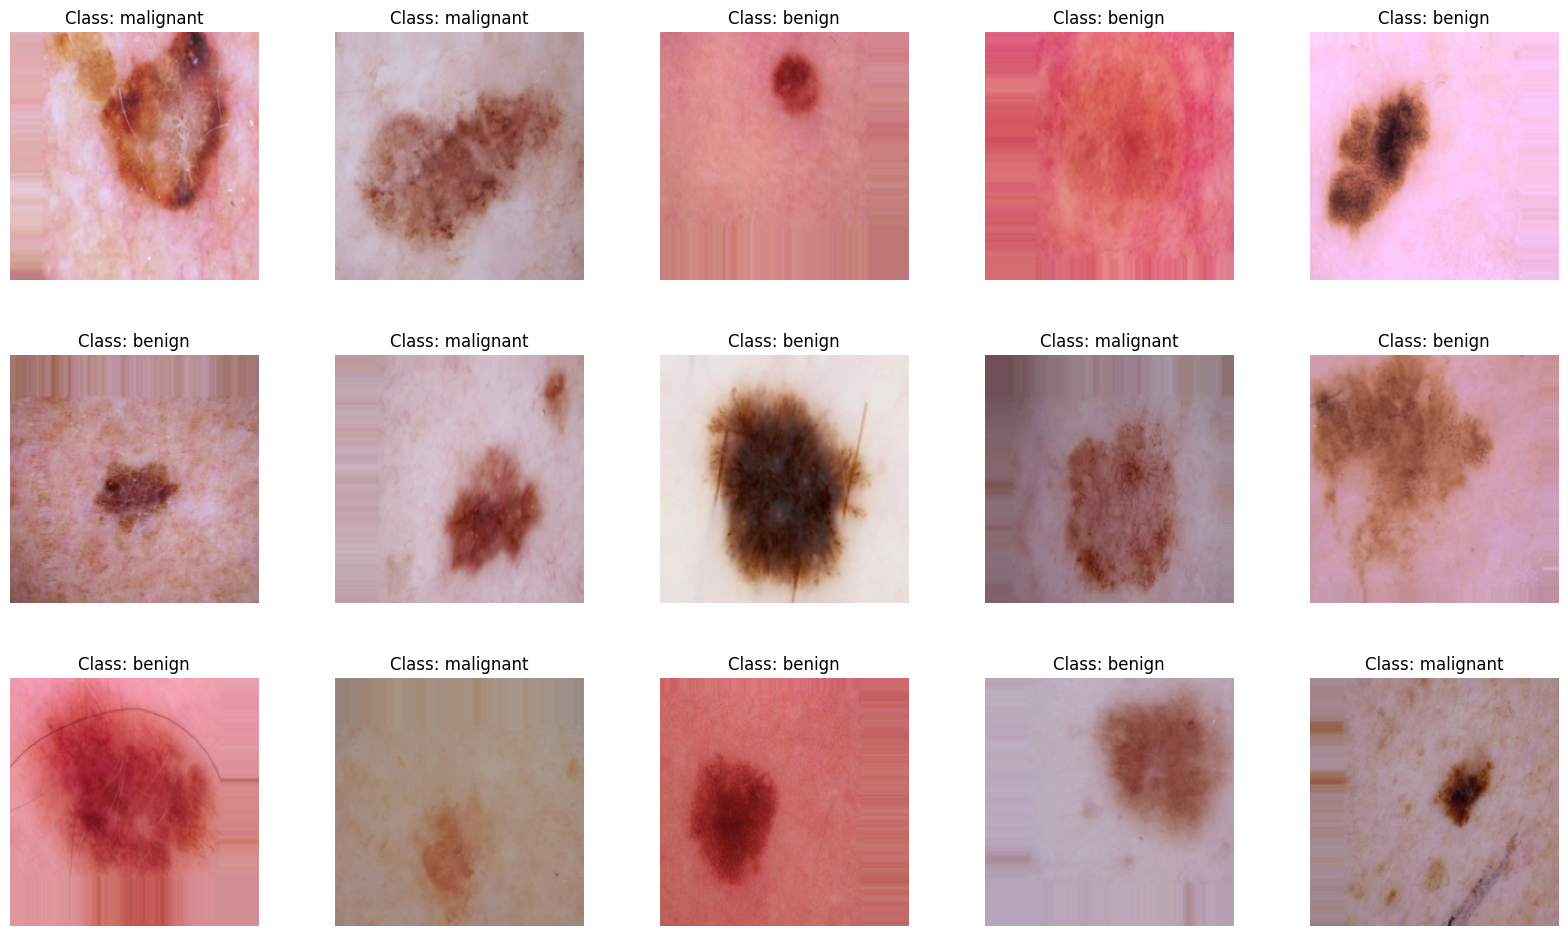

In [8]:
labels = [k for k in train_generator.class_indices]
sample_generate = train_generator.__next__()

images = sample_generate[0]
titles = sample_generate[1]
plt.figure(figsize = (20 , 20))

for i in range(15):
    plt.subplot(5 , 5, i+1)
    plt.subplots_adjust(hspace = 0.3 , wspace = 0.3)
    plt.imshow(images[i])
    plt.title(f'Class: {labels[np.argmax(titles[i],axis=0)]}')
    plt.axis("off")

In [9]:
print(len(train_generator))
print(len(test_ds))


83
50


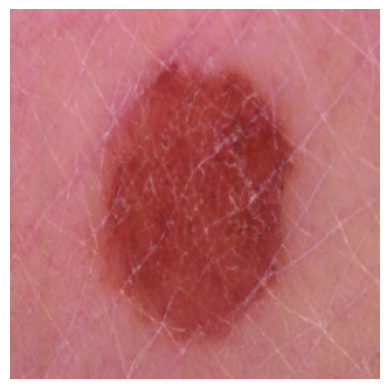

In [10]:
import matplotlib.pyplot as plt
from skimage import io

# Load image
img_url = "/content/drive/MyDrive/datasetskincancer/data/train/benign/1001.jpg"
img = io.imread(img_url)

# Display image
plt.imshow(img)
plt.axis('off')
plt.show()

In [11]:
from keras.layers import MaxPool2D

In [12]:
import numpy as np
from keras.layers import Dense,Flatten,Conv2D,Activation,Dropout

from keras import backend as K

import keras

from keras.models import Sequential, Model

from keras.models import load_model

from keras.optimizers import SGD

from keras.callbacks import EarlyStopping,ModelCheckpoint

from keras.layers import MaxPool2D

# Build VGG_19 Model

In [13]:
from keras.layers import MaxPool2D

In [14]:
from keras.layers import MaxPool2D

In [22]:
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model

# Define the input shape
input_shape = (224, 224, 3)

# Load the pre-trained EfficientNetB0 model without the top layers
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=input_shape)

# Freeze the base model layers to avoid training them
base_model.trainable = False

# Create the input layer
inputs = tf.keras.Input(shape=input_shape)

# Pass the input through the base model
x = base_model(inputs)

# Add custom layers on top of the pre-trained EfficientNet base
x = GlobalAveragePooling2D()(x)
x = Dropout(0.2)(x)  # Adding dropout for regularization
x = Dense(128, activation='relu')(x)
x = Dropout(0.2)(x)  # Adding dropout for regularization
outputs = Dense(2, activation='softmax')(x)  # Output layer for binary classification (2 classes)
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# Define the model
model= Model(inputs=inputs, outputs=outputs)

opt = Adam(learning_rate=0.00001)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

#   Model summary

In [23]:
# Print the model summary

model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_9 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ efficientnetb0 (Functional)          │ (None, 7, 7, 1280)          │       4,049,571 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_4           │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 1280)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │         163,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,213,797 (16.07 MB)

 Trainable params: 164,226 (641.51 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

In [24]:
history = model.fit(train_generator,
                    epochs=100,
                    validation_data=test_generator)


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


83/83 ━━━━━━━━━━━━━━━━━━━━ 1542s 17s/step - accuracy: 0.5288 - loss: 0.6921 - val_accuracy: 0.5455 - val_loss: 0.6900
Epoch 2/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 94s 486ms/step - accuracy: 0.5149 - loss: 0.6925 - val_accuracy: 0.5455 - val_loss: 0.6894
Epoch 3/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 46s 518ms/step - accuracy: 0.5259 - loss: 0.6922 - val_accuracy: 0.5455 - val_loss: 0.6892
Epoch 4/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 82s 497ms/step - accuracy: 0.5360 - loss: 0.6898 - val_accuracy: 0.5455 - val_loss: 0.6891
Epoch 5/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 80s 490ms/step - accuracy: 0.5623 - loss: 0.6865 - val_accuracy: 0.5455 - val_loss: 0.6891
Epoch 6/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 83s 503ms/step - accuracy: 0.5558 - loss: 0.6874 - val_accuracy: 0.5455 - val_loss: 0.6890
Epoch 7/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 83s 507ms/step - accuracy: 0.5630 - loss: 0.6872 - val_accuracy: 0.5455 - val_loss: 0.6890
Epoch 8/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 43s 481ms/step - accuracy: 0.5438 - loss: 0.6900 - val_accuracy

In [25]:
n_categories = len(os.listdir('/content/drive/MyDrive/datasetskincancer/data/test'))# number of categories print(n_categories)

In [26]:
n_categories

2

In [27]:
results =pd.DataFrame(history.history)
results.head()

,accuracy,loss,val_accuracy,val_loss
0,0.535457,0.691161,0.545455,0.690040
1,0.542662,0.690150,0.545455,0.689378
2,0.545696,0.689925,0.545455,0.689193
3,0.546834,0.688290,0.545455,0.689071
4,0.547213,0.689048,0.545455,0.689050


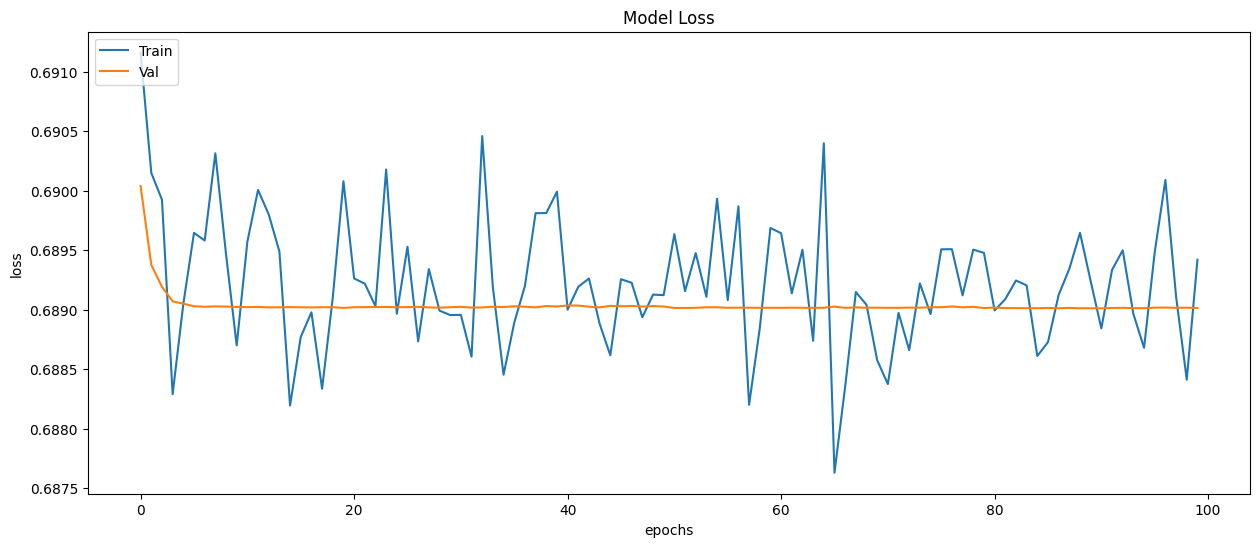

In [28]:
plt.figure(figsize=(15,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['Train','Val'], loc= 'upper left')
plt.show()

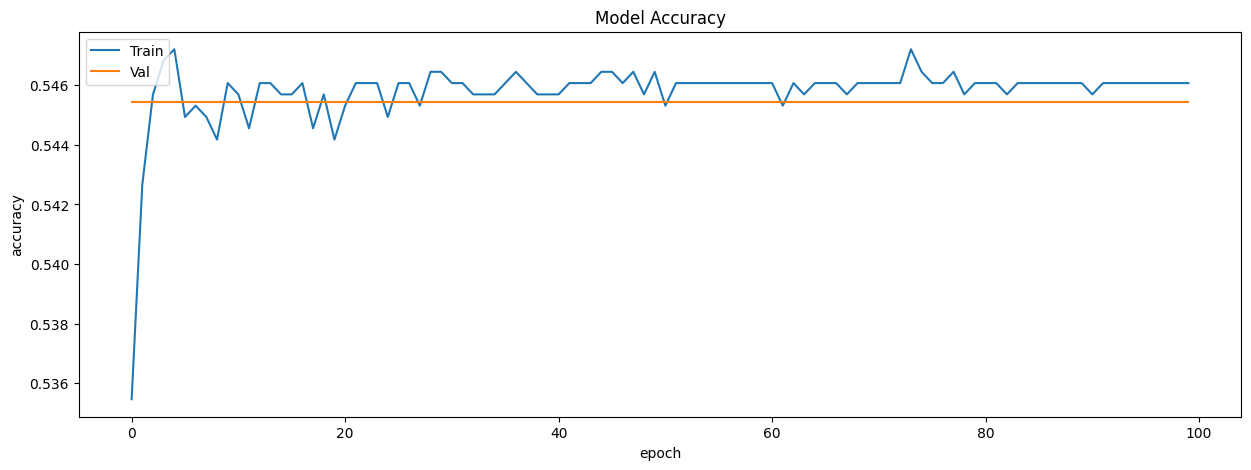

In [29]:
plt.figure(figsize=(15,5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [30]:
y_test_1 = test_generator.classes
y_pred_1 =model.predict(test_generator)
y_pred_1 = np.argmax(y_pred_1,axis=1)

21/21 ━━━━━━━━━━━━━━━━━━━━ 16s 497ms/step


In [31]:
results =model.evaluate(test_generator)

21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 157ms/step - accuracy: 0.8451 - loss: 0.6329


In [32]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix,precision_score, recall_score, roc_curve, f1_score

print(classification_report(y_test_1, y_pred_1))

              precision    recall  f1-score   support

           0       0.55      1.00      0.71       360
           1       0.00      0.00      0.00       300

    accuracy                           0.55       660
   macro avg       0.27      0.50      0.35       660
weighted avg       0.30      0.55      0.39       660



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [33]:
# Calculate metrics for each class
precision_0 = precision_score(y_test_1, y_pred_1, pos_label=0)
recall_0 = recall_score(y_test_1, y_pred_1, pos_label=0)
f1_0 = f1_score(y_test_1, y_pred_1, pos_label=0)
precision_1 = precision_score(y_test_1, y_pred_1, pos_label=1)
recall_1 = recall_score(y_test_1, y_pred_1, pos_label=1)
f1_1 = f1_score(y_test_1, y_pred_1, pos_label=1)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [34]:
# Calculate additional metrics
auc = roc_auc_score(y_test_1, y_pred_1)
tn, fp, fn, tp = confusion_matrix(y_test_1, y_pred_1).ravel()
precision = precision_score(y_test_1, y_pred_1)
recall = recall_score(y_test_1, y_pred_1)
specificity = tn / (tn + fp)
fdr = fp / (fp + tp)
fnr = fn / (fn + tp)
fpr = fp / (fp + tn)



# Print additional metrics for each class
print("Additional Metrics for Class 0:")
print(f"Precision: {precision_0:.2f}")
print(f"Recall: {recall_0:.2f}")
print(f"Specificity: {specificity:.2f}")
print(f"F1 Score: {f1_0:.2f}")
print(f"FDR: {fdr:.2f}")
print(f"FNR: {fnr:.2f}")
print(f"FPR: {fpr:.2f}\n")

print("Additional Metrics for Class 1:")
print(f"Precision: {precision_1:.2f}")
print(f"Recall: {recall_1:.2f}")
print(f"Specificity: {specificity:.2f}")
print(f"F1 Score: {f1_1:.2f}")
print(f"FDR: {fdr:.2f}")
print(f"FNR: {fnr:.2f}")
print(f"FPR: {fpr:.2f}\n")

# Print average metrics
precision_avg = (precision_0 + precision_1) / 2
recall_avg = (recall_0 + recall_1) / 2
f1_avg = (f1_0 + f1_1) / 2

print("Average Metrics:")
print(f"Precision: {precision_avg:.2f}")
print(f"Recall: {recall_avg:.2f}")
print(f"F1 Score: {f1_avg:.2f}")
print(f"AUC: {auc:.2f}")
print(f"Specificity: {specificity:.2f}")
print(f"FDR: {fdr:.2f}")
print(f"FNR: {fnr:.2f}")
print(f"FPR: {fpr:.2f}")




Additional Metrics for Class 0:
Precision: 0.55
Recall: 1.00
Specificity: 1.00
F1 Score: 0.71
FDR: nan
FNR: 1.00
FPR: 0.00

Additional Metrics for Class 1:
Precision: 0.00
Recall: 0.00
Specificity: 1.00
F1 Score: 0.00
FDR: nan
FNR: 1.00
FPR: 0.00

Average Metrics:
Precision: 0.27
Recall: 0.50
F1 Score: 0.35
AUC: 0.50
Specificity: 1.00
FDR: nan
FNR: 1.00
FPR: 0.00


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
<ipython-input-34-2b04a3da5b0c>:7: RuntimeWarning: invalid value encountered in scalar divide
  fdr = fp / (fp + tp)


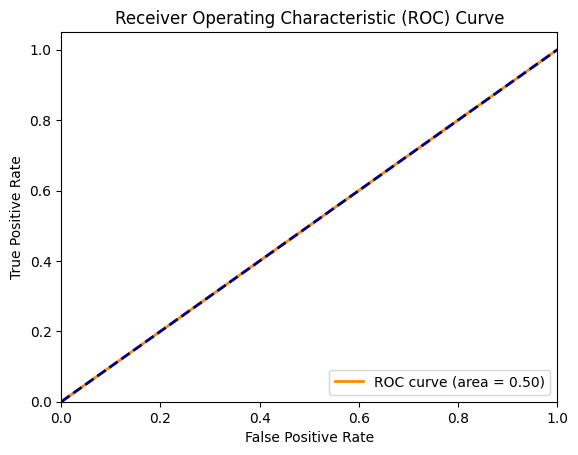

In [35]:
import matplotlib.pyplot as plt
# Calculate ROC curve
fpr_values, tpr_values, _ = roc_curve(y_test_1, y_pred_1)

# Plot ROC curve
plt.figure()
plt.plot(fpr_values, tpr_values, color='darkorange', lw=2, label=f'ROC curve (area = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

12/12 ━━━━━━━━━━━━━━━━━━━━ 14s 833ms/step


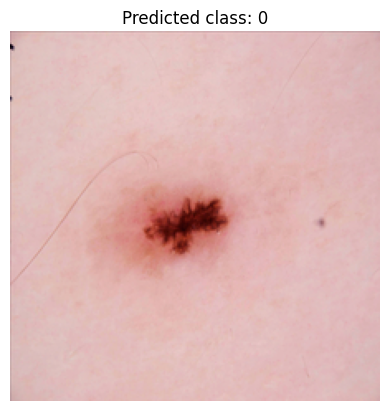

In [36]:
from PIL import Image
import os
import numpy as np
import matplotlib.pyplot as plt

image_directory = '/content/drive/MyDrive/datasetskincancer/data/test/benign'
img_size = 224

images = []
for filename in os.listdir(image_directory):
    path = os.path.join(image_directory, filename)
    img = Image.open(path)
    img = img.resize((img_size, img_size))
    images.append(img)

images = np.array([np.array(img) for img in images])
images = images / 255.0

predictions = model.predict(images)

# Select image to display
img_index = 0

# Get predicted class label
class_label = np.argmax(predictions[img_index])

# Display image and predicted class label
plt.imshow(images[img_index])
plt.axis('off')
plt.title('Predicted class: ' + str(class_label))
plt.show()

In [37]:
for i in range(len(images)):
    predicted_class = np.argmax(predictions[i])
    class_probability = predictions[i, predicted_class]
    print(f'Predicted class for {i+1}.jpg : {labels[predicted_class]}')
    print('Class probability:', class_probability)

Predicted class for 1.jpg : benign
Class probability: 0.5467126
Predicted class for 2.jpg : benign
Class probability: 0.54671824
Predicted class for 3.jpg : benign
Class probability: 0.5467145
Predicted class for 4.jpg : benign
Class probability: 0.5467111
Predicted class for 5.jpg : benign
Class probability: 0.5467307
Predicted class for 6.jpg : benign
Class probability: 0.5467012
Predicted class for 7.jpg : benign
Class probability: 0.5467324
Predicted class for 8.jpg : benign
Class probability: 0.5467089
Predicted class for 9.jpg : benign
Class probability: 0.5466997
Predicted class for 10.jpg : benign
Class probability: 0.54671013
Predicted class for 11.jpg : benign
Class probability: 0.5466979
Predicted class for 12.jpg : benign
Class probability: 0.5467126
Predicted class for 13.jpg : benign
Class probability: 0.54669404
Predicted class for 14.jpg : benign
Class probability: 0.5467057
Predicted class for 15.jpg : benign
Class probability: 0.5466951
Predicted class for 16.jpg : be